<a href="https://colab.research.google.com/github/valeromora/Teoria_Se-ales/blob/main/ST_Taller_3_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

Epoch 1/1000
1/1 [==============================] - 1s 566ms/step - loss: 219.3499
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 10.0870
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.4855
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0448
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0244
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0232
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0230
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0228
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0226
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0224
Epoch 11/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0222
Epoch 12/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0220
Epoch 13/1000
1/1 [======================

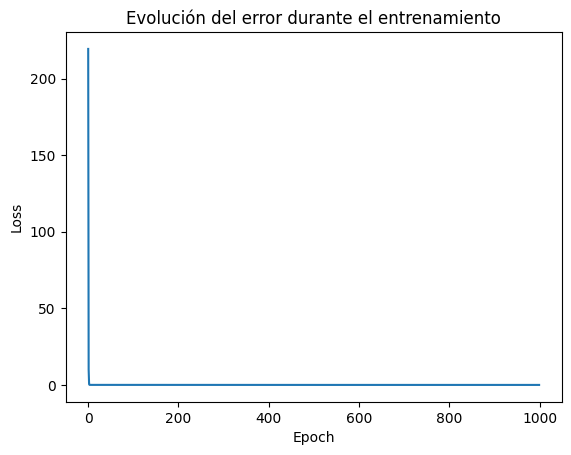

In [2]:
#Define datos de entremamiento
x_train = np.array([1,2,3,4,5,6,7,8,9,10])
y_train = np.array([2,4,6,8,10,12,14,16,18,20])

#Definimos el modelo en Keras
model = Sequential()
model.add(Dense(1, input_shape = (1,)))
model.compile(loss="mean_squared_error", optimizer = SGD(learning_rate=0.01))

#Entrena el modelo
history = model.fit(x_train, y_train, epochs=1000, verbose=1)

#imprime el error final
losses = history.history['loss']

#grafica la evolución del error
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.title("Evolución del error durante el entrenamiento")
plt.show()

1/1 [==============================] - 0s 92ms/step


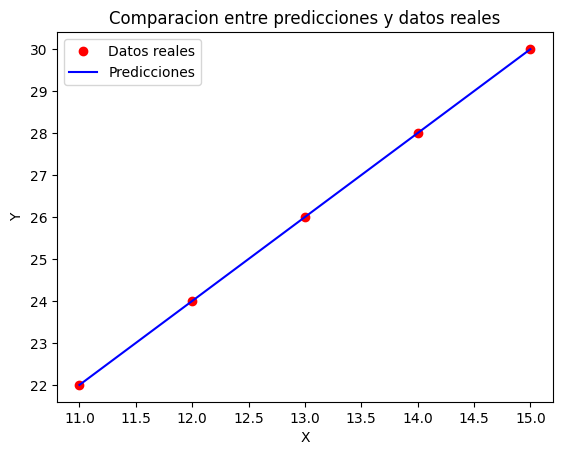

In [3]:
#Genera predicciones y calcula el error en un conjunto de prueba
x_test = np.array([11,12,13,14,15])
y_test = np.array([22,24,26,28,30])
y_pred = model.predict(x_test)

mse = np.mean((y_test - y_pred.squeeze())**2)

#Grafica la comparación entre las predicciones y los datos reales
plt.plot(x_test,y_test, "ro", label="Datos reales")
plt.plot(x_test, y_pred, "b-", label = "Predicciones")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Comparacion entre predicciones y datos reales")
plt.show()

In [3]:
df=pd.read_csv('/content/Ice Cream Sales - temperatures.csv')
df.head(10)                                   ##Se muestran las 10 primeras filas del dataframe

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02
5,43,15.88
6,44,19.07
7,44,19.57
8,45,21.62
9,45,22.34


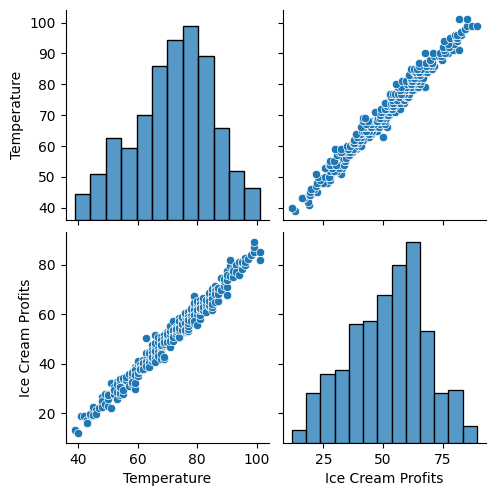

In [4]:
df = df.loc[:, ['Temperature', 'Ice Cream Profits']]          #se seleccionan solo esas columnas para realizar el pairplot
sns.pairplot(df)
plt.show()

In [5]:
X = df['Temperature'].values.reshape(-1,1)              #Datos conocidos
y = df['Ice Cream Profits'].values.reshape(-1,1)         #Se va a estimar las ganancias

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)        #Se definen los datos de entreno, prueba

In [7]:
regression = [SVR(),ElasticNet(),DecisionTreeRegressor(), RandomForestRegressor()]            #Se preseleccionan 4 diferentes modelos de regresión y se evaluará cual funciona mejor

score_matrix = [['SVR',0,0],
                ['ElasticNet',0,0],
                ['Tree',0,0],
                ['Forest',0,0]
]

In [8]:
from sklearn.model_selection import cross_val_score, KFold

i = 0

K = KFold(n_splits=10,shuffle=False)

for model in regression:
    scores = cross_val_score(estimator=model, X = X_train, y = y_train, cv = K)
    score_matrix[i][1] = scores.mean()
    score_matrix[i][2] = scores.std()
    i+=1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [9]:
score_matrix

[['SVR', 0.8722134084019295, 0.05672430448034593],
 ['ElasticNet', 0.9703334666862806, 0.009820488317711462],
 ['Tree', 0.9563076960478346, 0.012169273577648266],
 ['Forest', 0.9604336131820004, 0.010976442167358729]]

In [15]:
model = ElasticNet()          #se seleccionó el modelo de regresión lineal decisionElasticNetRegressor porque fue el que mejor se ajustó
model.fit(X_train, y_train)             #Se entrena el modelo por medio de los datos Temperature y Ice Cream Profits

ElasticNet()

In [16]:
y_pred = model.predict(X_test)          #Por medio de lo que aprendió el modelo se hace la predicción con los datos que no conoce
print(np.shape(y_pred))
print(np.shape(X_test))

(121,)
(121, 1)


In [17]:
R=r2_score(y_test, y_pred)            #Se verifica el índice de correlación evaluar el rendimiento
print(R)

0.9831427915714571


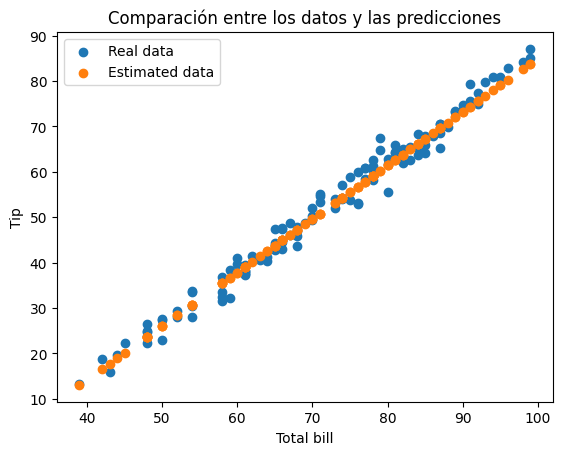

In [18]:
plt.scatter(X_test,y_test, label='Real data')
plt.scatter(X_test, y_pred, label='Estimated data')
plt.legend()
plt.xlabel("Total bill")
plt.ylabel("Tip")
plt.title("Comparación entre los datos y las predicciones")
plt.show()